# Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Reading The Data From The Csv File

In [3]:
# read diabetes data from csv file
diabetes_df = pd.read_csv("./data/diabetes.csv")
# print the first 5 rows of the dataframe
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Analysis

In [4]:
# print the columns of the dataframe
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
# prints information about diabetes_df including the index dtype and columns, non-null values and memory usage.
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# prints the number of missing values in each column of diabetes_df
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Visualization 

In [5]:
# Count the total number of classification labels（Outcome） of diabetes or not
outcome_count = diabetes_df['Outcome'].value_counts()
outcome_count

Outcome
0    500
1    268
Name: count, dtype: int64

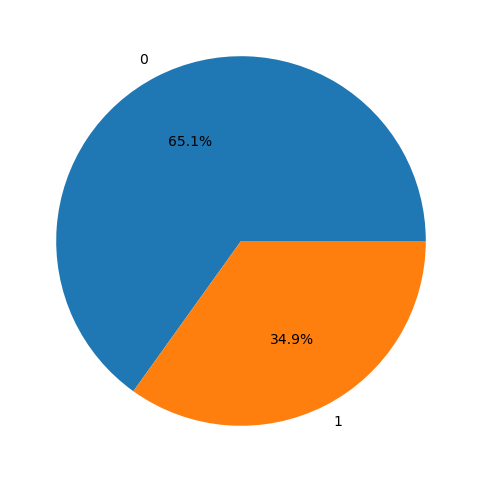

In [6]:
# Plot the pie chart of diabete proportions
plt.figure(figsize=(6,6))
plt.pie(outcome_count, labels = outcome_count.index, autopct = '%1.1f%%')
#plt.title('The pie chart of diabete proportions')
plt.show()

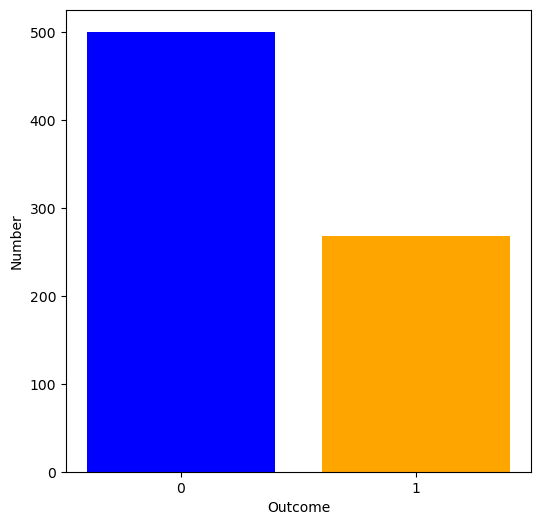

In [7]:
# bar chart of the number of diabetes and non-diabetes
plt.figure(figsize=(6,6))
plt.bar(outcome_count.index, outcome_count, color = ['blue', 'orange'])
plt.xticks(outcome_count.index, [0, 1])
#plt.title('The bar chart of the number of diabetes and non-diabetes')
plt.xlabel('Outcome')
plt.ylabel('Number')
plt.show()

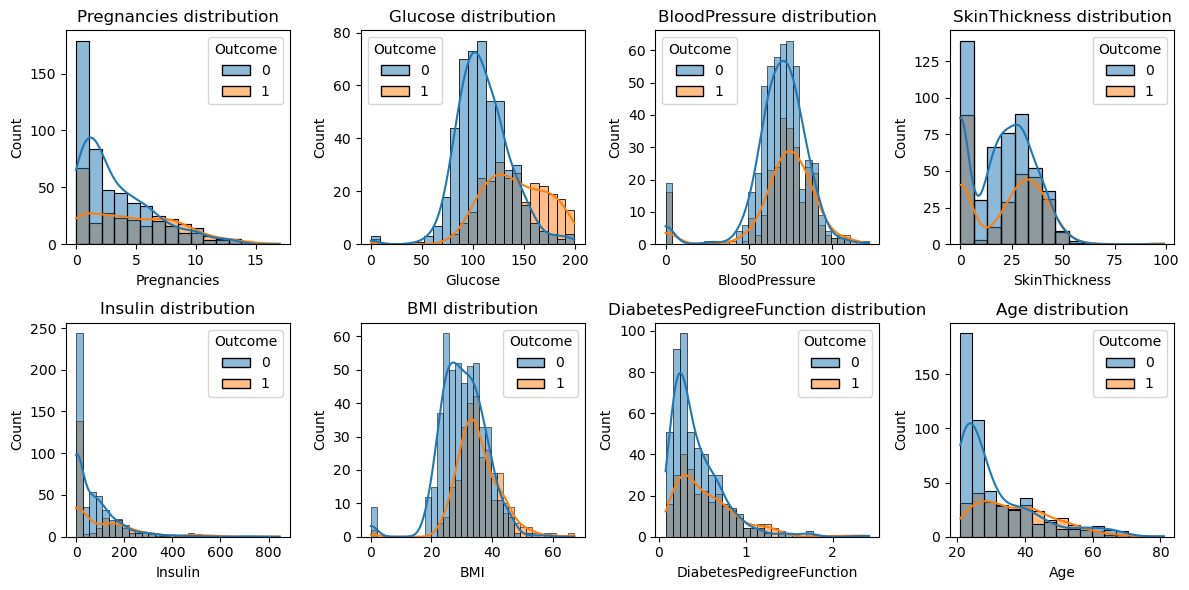

In [8]:
# Plot the histogram of the distribution of each feature(except for the Outcome column in the diabetes data set),
# and distinguish the distribution of diabetes and non-diabetes, and draw the kernel density estimation curve.
plt.figure(figsize = (12, 6))
for i, col in enumerate(diabetes_df.columns[:-1]):
    plt.subplot(2, 4, i+1)
    sns.histplot(data = diabetes_df, x = col, hue= 'Outcome', kde = True)
    plt.title(f'{col} distribution')
plt.tight_layout()
plt.show()

In [9]:
# correlation outcomes with other columns
diabetes_df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

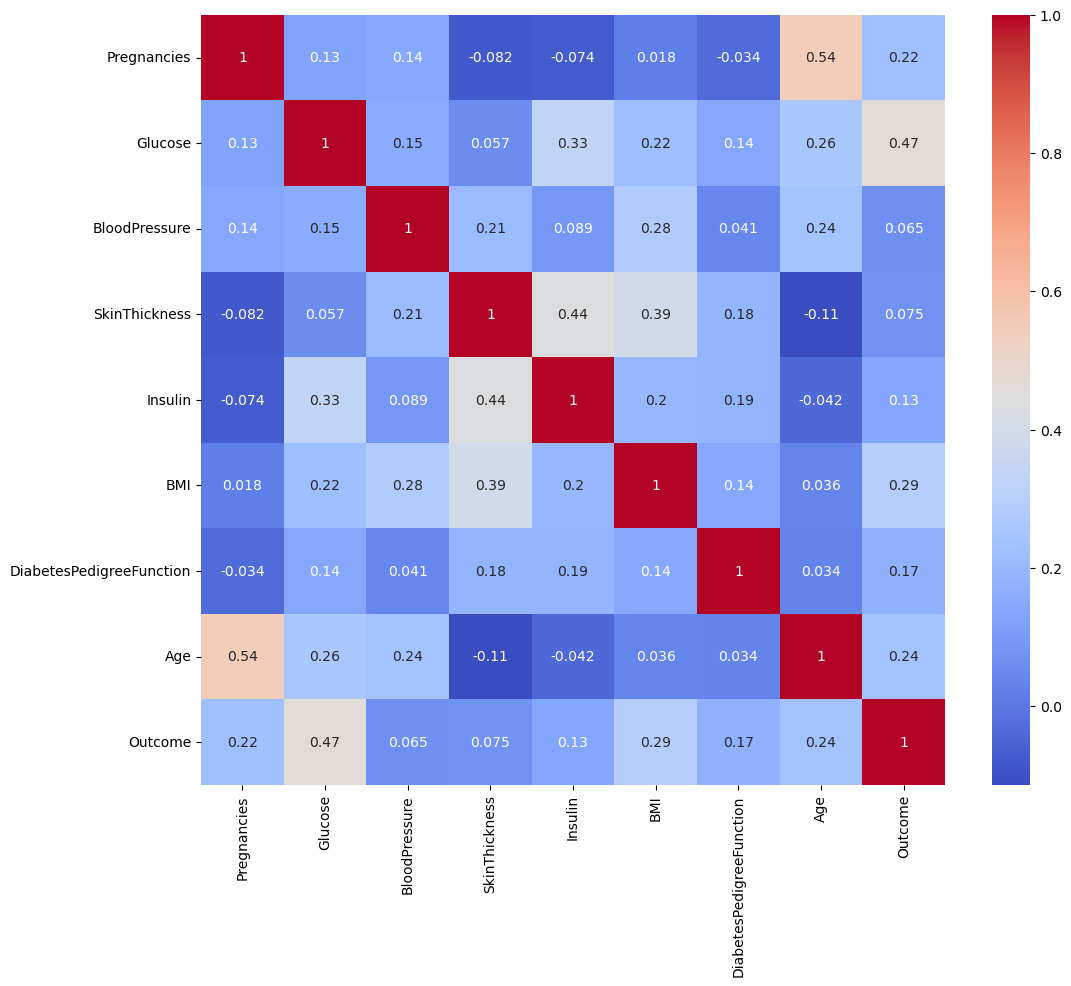

In [10]:
# Plot the correlation heatmap of diabetes data, and annotate the correlation coefficient, and use the coolwarm color map.
plt.figure(figsize = (12, 10))
sns.heatmap(diabetes_df.corr(), annot = True, cmap = 'coolwarm')
#plt.title('The correlation heatmap of diabetes data')
plt.show()

#  Prepare data

In [11]:
# prints the last 5 rows of diabetes_df
diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [12]:
# prints the number of missing values in each column of diabetes_df
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
def prepare_data(data):
    # define X and Y, X is the feature matrix, y is the target vector
    X = data.drop('Outcome', axis=1)
    y = data['Outcome']
    
    # split the data into training and testing sets, 80% of the data will be used for training and 20% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train.values, y_test.values, X.columns

# Train Model

## Perceptron

In [14]:
#perceptron algorithm
class Perceptron:
  def __init__(self, learning_rate = 0.01, epoch = 1000):
    self.learning_rate = learning_rate
    self.epoch = epoch
    self.weights = None
    self.bais = None
    self.epoch_errors = []
    self.losses = []

  def fit(self, X, y, is_analytic = True):
    n_sample, n_feature = X.shape
    self.weights = np.zeros(n_feature)
    self.bais = 0

    for epoch in range(self.epoch):
      epoch_loss = 0  # Initialize as scalar
      missclassification = 0 # count the number of misclassifications
      for x_i, y_i in zip(X, y):
        weight_sum = np.dot(x_i, self.weights) + self.bais
        # apply step function, if the value is greater than or equal to 0, the output is 1, otherwise 0
        y_predicted = self.sigmoid(weight_sum)

        # gradient descent Update weights and bias
        error = y_i - y_predicted
        self.weights += self.learning_rate * error * x_i
        self.bais += self.learning_rate * error

        # calculate the loss, binary cross entropy loss
        epoch_loss -= y_i * np.log(y_predicted) + (1 - y_i) * np.log(1 - y_predicted)  

        # count the number of misclassifications
        if round(y_predicted) != y_i:
          missclassification += 1

      # calculate the average loss in each epoch
      average_loss = epoch_loss / n_sample
      self.losses.append(average_loss)
      self.epoch_errors.append(missclassification)
      
     
      if not is_analytic and epoch % 100 == 0:
        print(f"Epoch {epoch}/{self.epoch}, average loss: {average_loss :.4f}")
        print(f"Epoch {epoch}/{self.epoch}, number of misclassifications: {missclassification}")

  # apply sigmoid function
  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  # predict the output, if the value is greater than or equal to 0, the output is 1, otherwise 0
  def predict(self, X):
    linear_output = np.dot(X, self.weights) + self.bais
    return (self.sigmoid(linear_output) >= 0.5).astype(int)
  
  # plot loss graph
  def plot_loss(self):
    plt.figure(figsize = (12, 6))
    plt.plot(range(1, len(self.losses) + 1), self.losses)
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
  
  # plot the number of misclassifications
  def plot_misclassification(self):
    plt.figure(figsize = (12, 6))
    plt.plot(range(1, len(self.epoch_errors) + 1), self.epoch_errors)
    plt.title('Number of Misclassifications over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Number of Misclassifications')
    plt.show()

    
X_train, X_test, y_train, y_test, feature_names = prepare_data(diabetes_df)
perceptron = Perceptron(learning_rate = 0.01, epoch = 1000)
# train the perceptron model, only use the first two features
perceptron.fit(X_train, y_train, is_analytic = False)

Epoch 0/1000, average loss: 0.5541
Epoch 0/1000, number of misclassifications: 143
Epoch 100/1000, average loss: 0.4750
Epoch 100/1000, number of misclassifications: 139
Epoch 200/1000, average loss: 0.4750
Epoch 200/1000, number of misclassifications: 139
Epoch 300/1000, average loss: 0.4750
Epoch 300/1000, number of misclassifications: 139
Epoch 400/1000, average loss: 0.4750
Epoch 400/1000, number of misclassifications: 139
Epoch 500/1000, average loss: 0.4750
Epoch 500/1000, number of misclassifications: 139
Epoch 600/1000, average loss: 0.4750
Epoch 600/1000, number of misclassifications: 139
Epoch 700/1000, average loss: 0.4750
Epoch 700/1000, number of misclassifications: 139
Epoch 800/1000, average loss: 0.4750
Epoch 800/1000, number of misclassifications: 139
Epoch 900/1000, average loss: 0.4750
Epoch 900/1000, number of misclassifications: 139


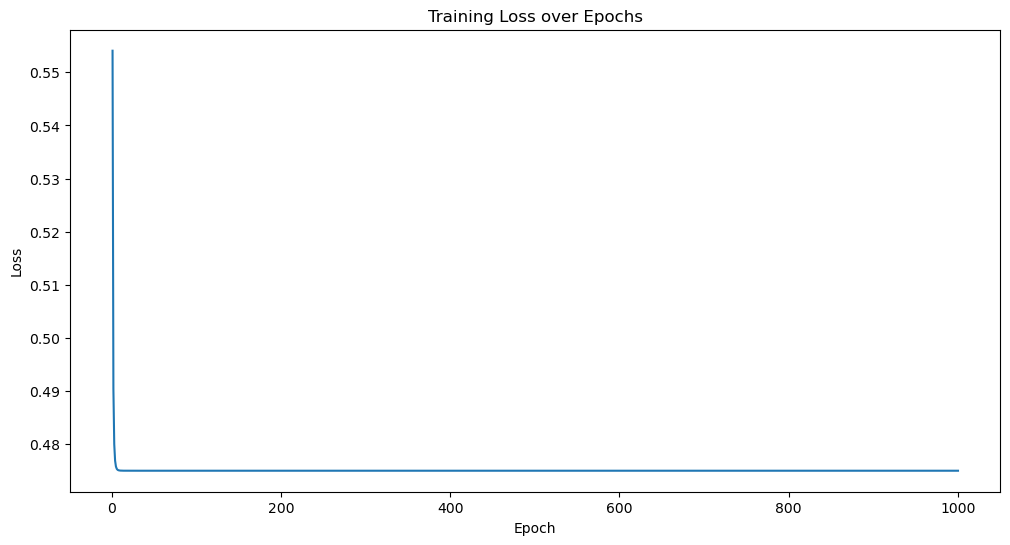

In [15]:
# plot the loss graph
perceptron.plot_loss()

In [16]:
# results of the model
def evaluate_model(y_true, y_pred, perceptron, dataset_type = 'Testing'):
    accuracy = np.mean(y_true == y_pred)
    precision = np.sum((y_true == 1) & (y_pred == 1)) / np.sum(y_pred == 1)
    recall = np.sum((y_true == 1) & (y_pred == 1)) / np.sum(y_true == 1)
    f1 = 2 * precision * recall / (precision + recall)

    #confusionMatrix = confusion_matrix(y_true, y_pred)
   # classificationReport = classification_report(y_true, y_pred)

    #  Calculate number of misclassifications
    misclassifications = np.sum(y_true != y_pred)
    print(f'\n Number of Misclassifications: {misclassifications}')
    
    print(f'{dataset_type} Accuracy: {accuracy:.4f}')
    print(f'{dataset_type} Precision: {precision:.4f}')
    print(f'{dataset_type} Recall: {recall:.4f}')
    print(f'{dataset_type} F1 Score: {f1:.4f} \n')
    # print(f'\n {dataset_type} Classification Report:')
    # print(classificationReport)


#Evaluate on training set
y_train_pred = perceptron.predict(X_train)
print("Perceptron Model Evaluation on Training Set:")
evaluate_model(y_train, y_train_pred, perceptron, dataset_type = 'Training')

#Evaluate on testing set
y_pred = perceptron.predict(X_test)
print("Perceptron Model Evaluation on Testing Set:")
evaluate_model(y_test, y_pred, perceptron, dataset_type = 'Testing')


Perceptron Model Evaluation on Training Set:

 Number of Misclassifications: 136
Training Accuracy: 0.7785
Training Precision: 0.7278
Training Recall: 0.5775
Training F1 Score: 0.6440 

Perceptron Model Evaluation on Testing Set:

 Number of Misclassifications: 37
Testing Accuracy: 0.7597
Testing Precision: 0.6607
Testing Recall: 0.6727
Testing F1 Score: 0.6667 



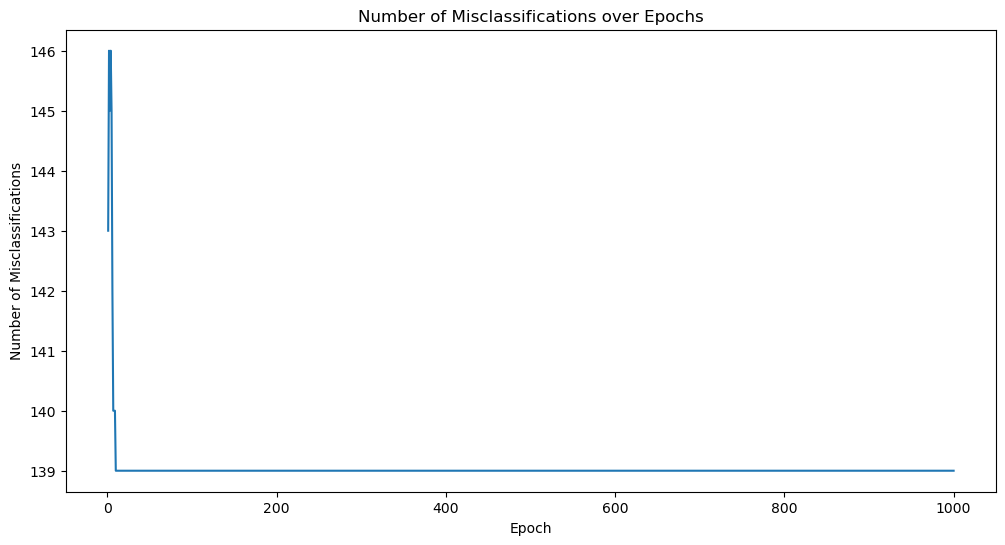

In [29]:
# Perceptron Plots
perceptron.plot_misclassification()

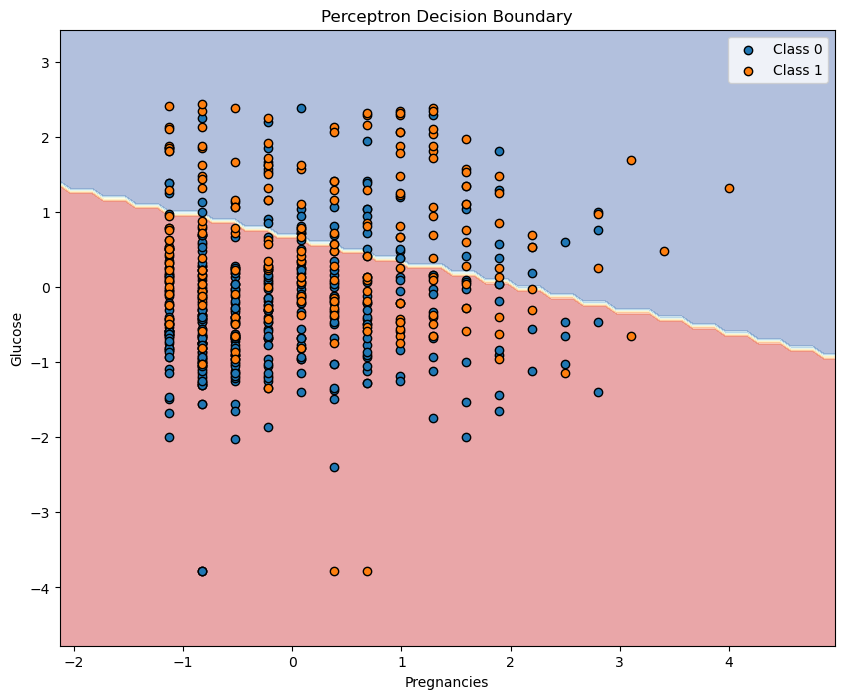

In [17]:
# plot the decision boundary of the perceptron model
def plot_decision_boundary(X, y, perceptron, feature_names):
    # x1 and x2 limits, which are used to create the meshgrid, which is the rectangular grid of points, used to plot the decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # 0.1 = step size, the distance between two adjacent points in the meshgrid
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), 
                           np.arange(x2_min, x2_max, 0.1))
    
    # create a grid of points using the meshgrid
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    # calculate the weight sum for each point in the grid
    preds = perceptron.predict(grid)
    # reshape the predictions into the shape of the meshgrid
    preds = preds.reshape(xx1.shape)

    # plot the decision boundary, which is the contour line that separates the two classes, class 0 and class 1
    plt.figure(figsize=(10, 8))
    plt.contourf(xx1, xx2, preds, alpha = 0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', cmap = plt.cm.RdYlBu, edgecolor='black')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', cmap = plt.cm.RdYlBu, edgecolor='black')
    # plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu, edgecolor='black')
    plt.title('Perceptron Decision Boundary')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# Ensure the perceptron is trained with only the first two features
perceptron.fit(X_train[:, :2], y_train)
plot_decision_boundary(X_train, y_train, perceptron, feature_names[:2])


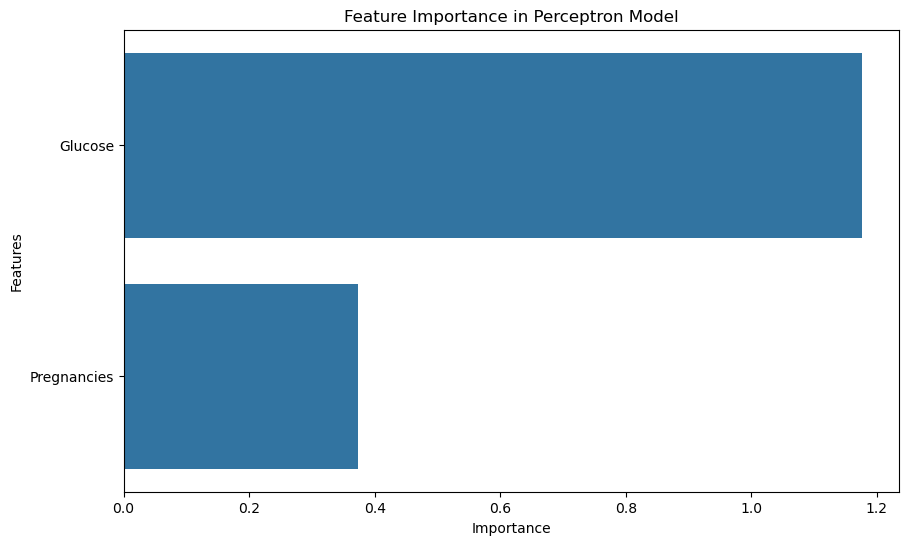

In [18]:
# Analyze the feature importance in the perceptron model
def analyze_feature_importance(perceptron, feature_names):
    # Ensure feature_names matches the length of perceptron.weights
    feature_names = feature_names[:len(perceptron.weights)]
    
    feature_importance = pd.DataFrame({
        'Features' : feature_names,
        'Importance' : np.abs(perceptron.weights)
    })
    
    feature_importance = feature_importance.sort_values('Importance', ascending = False)
    
    plt.figure(figsize = (10, 6))
    sns.barplot(x = 'Importance', y = 'Features', data = feature_importance)
    plt.title('Feature Importance in Perceptron Model')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

analyze_feature_importance(perceptron, feature_names) 

In [19]:
# analyze the effect of the learning rate on the model performance
learning_rates = [0.001, 0.01, 0.1, 1, 10]
for lr in learning_rates:
    print(f"Learning Rate: {lr}")
    perceptron = Perceptron(learning_rate = lr, epoch = 1000)
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    evaluate_model(y_test, y_pred, perceptron)
    #plot_perceptron_errors(perceptron.epoch_errors)
   # analyze_feature_importance(perceptron, diabetes_df.columns[:2])
    #plot_decision_boundary(X_train[:, :2], y_train, perceptron)
    print("\n\n")



Learning Rate: 0.001

 Number of Misclassifications: 39
Testing Accuracy: 0.7468
Testing Precision: 0.6379
Testing Recall: 0.6727
Testing F1 Score: 0.6549 




Learning Rate: 0.01

 Number of Misclassifications: 37
Testing Accuracy: 0.7597
Testing Precision: 0.6607
Testing Recall: 0.6727
Testing F1 Score: 0.6667 




Learning Rate: 0.1

 Number of Misclassifications: 35
Testing Accuracy: 0.7727
Testing Precision: 0.6786
Testing Recall: 0.6909
Testing F1 Score: 0.6847 




Learning Rate: 1

 Number of Misclassifications: 33
Testing Accuracy: 0.7857
Testing Precision: 0.7500
Testing Recall: 0.6000
Testing F1 Score: 0.6667 




Learning Rate: 10

 Number of Misclassifications: 36
Testing Accuracy: 0.7662
Testing Precision: 0.7021
Testing Recall: 0.6000
Testing F1 Score: 0.6471 






In [27]:
# analyze the effect of the number of epochs on the model performance
epochs = [100, 500, 1000, 1500, 2000]
for epoch in epochs:
    print(f"Epochs: {epoch}")
    perceptron = Perceptron(learning_rate = 0.1, epoch = epoch)
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    evaluate_model(y_test, y_pred, perceptron)
    # perceptron.plot_loss()
    #analyze_feature_importance(perceptron, diabetes_df.columns[:2])
    #plot_decision_boundary(X_train[:, :2], y_train, perceptron)
    print("\n\n")

Epochs: 100

 Number of Misclassifications: 35
Testing Accuracy: 0.7727
Testing Precision: 0.6786
Testing Recall: 0.6909
Testing F1 Score: 0.6847 




Epochs: 500

 Number of Misclassifications: 35
Testing Accuracy: 0.7727
Testing Precision: 0.6786
Testing Recall: 0.6909
Testing F1 Score: 0.6847 




Epochs: 1000

 Number of Misclassifications: 35
Testing Accuracy: 0.7727
Testing Precision: 0.6786
Testing Recall: 0.6909
Testing F1 Score: 0.6847 




Epochs: 1500

 Number of Misclassifications: 35
Testing Accuracy: 0.7727
Testing Precision: 0.6786
Testing Recall: 0.6909
Testing F1 Score: 0.6847 




Epochs: 2000

 Number of Misclassifications: 35
Testing Accuracy: 0.7727
Testing Precision: 0.6786
Testing Recall: 0.6909
Testing F1 Score: 0.6847 







 Number of Misclassifications: 35
Testing Accuracy: 0.7727
Testing Precision: 0.7174
Testing Recall: 0.6000
Testing F1 Score: 0.6535 



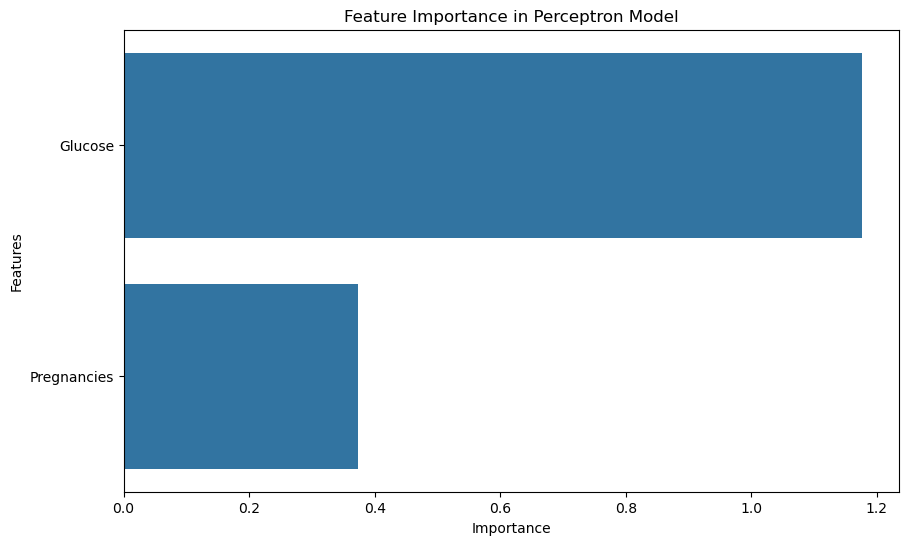

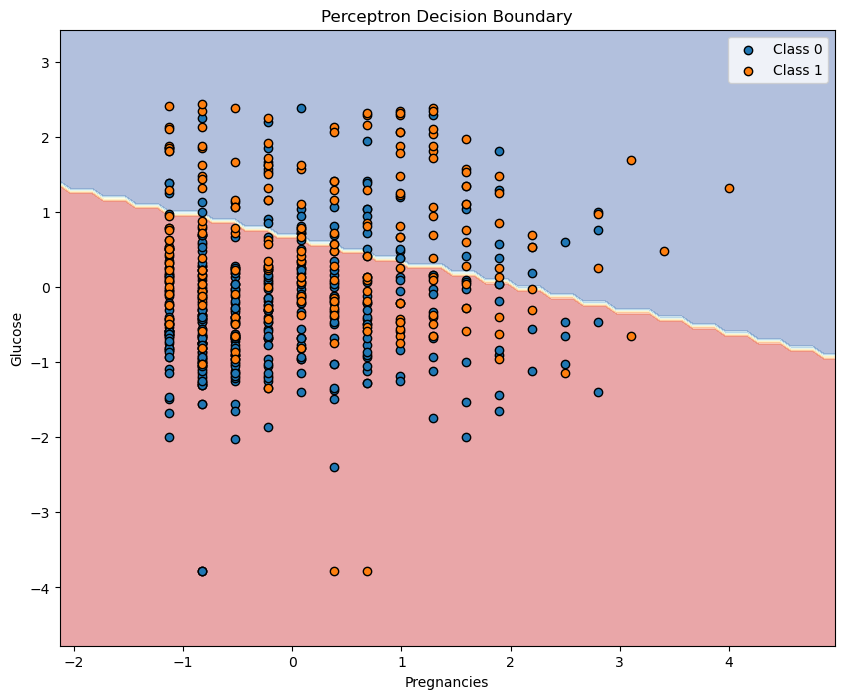

In [29]:
# analyze the effect of the number of features on the model performance
X_train, X_test, y_train, y_test, feature_names = prepare_data(diabetes_df)
perceptron = Perceptron(learning_rate = 0.01, epoch = 1000)
perceptron.fit(X_train[:, :2], y_train)
y_pred = perceptron.predict(X_test[:, :2])
evaluate_model(y_test, y_pred, perceptron)
# perceptron.plot_loss(perceptron.epoch_errors)
analyze_feature_importance(perceptron, feature_names[:2])
plot_decision_boundary(X_train[:, :2], y_train, perceptron, feature_names[:2])




 Number of Misclassifications: 36
Testing Accuracy: 0.7662
Testing Precision: 0.6939
Testing Recall: 0.6182
Testing F1 Score: 0.6538 



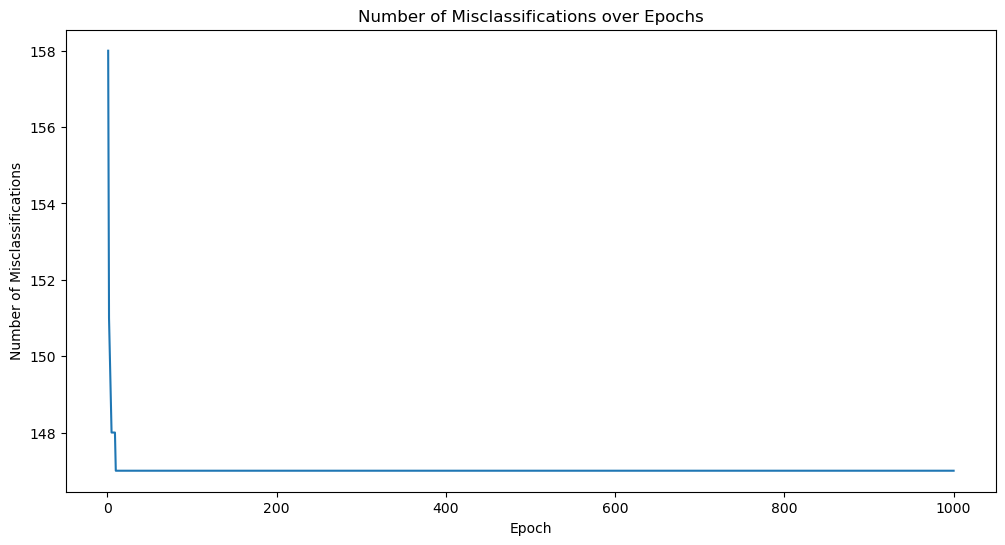

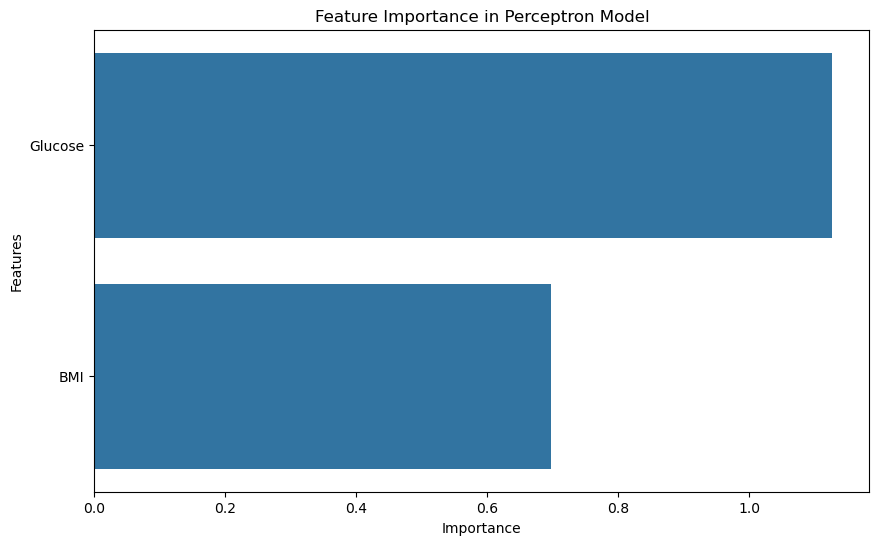

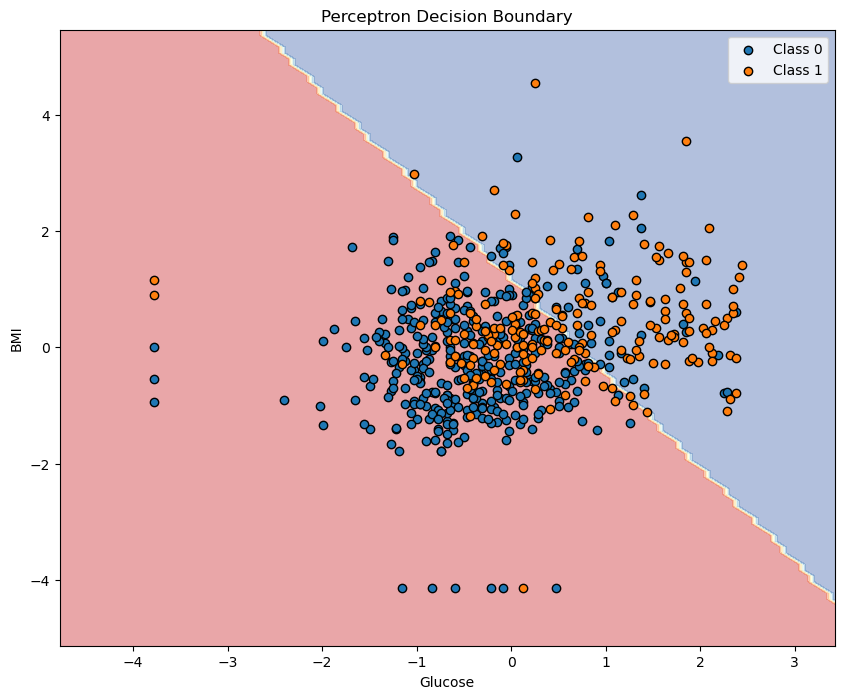

In [28]:
# use the most two important features to train the perceptron model
perceptron = Perceptron(learning_rate = 0.01, epoch = 1000)
important_features_indices = [1, 5]
perceptron.fit(X_train[:, important_features_indices], y_train)
y_pred = perceptron.predict(X_test[:, important_features_indices])
evaluate_model(y_test, y_pred, perceptron)
# perceptron.plot_loss()
perceptron.plot_misclassification()
analyze_feature_importance(perceptron, feature_names[important_features_indices])
plot_decision_boundary(X_train[:, important_features_indices], y_train, perceptron, feature_names[important_features_indices])
